In [1]:
import pandas as pd

In [2]:
path='C:/Users\dmckenzie\BigRoomContentsCluster2.csv'

In [3]:
DATIS=pd.read_csv(path)

In [4]:
import numpy as np

In [5]:
from dandylocal import *

In [6]:
pd.Series(RuleBasedRoomInputClassifier(DATIS['Name2'],SeriesLabs=DATIS['FinalFinalLab'])).value_counts()

tables table wall walls           9457
table                             3470
wall outlet                       2685
casework                          2139
models                            2116
                                  ... 
base cabinet sink                    1
paper towel dispenser                1
single door solid                    1
panel panel top cap transition       1
worksurface shape corner             1
Length: 588, dtype: int64

In [13]:
DATIS[DATIS['FinalFinalLab2']=='table']

,Unnamed: 0,FinalLab,NameFilter,Category,Name,Total,Name2,Cluster,Label,ClustTotal,ClustRoomTotal,ClustRoomTypePorp,Checker,NF2,FinalFinalLab,FinalFinalLab2,FinalFinalLab2SUM
349,349,adjustable adjust table,cabinet cup dispenser adjustable width,Casework,Cabinet - 2 Cup Dispenser - Adjustable Width,2,cabinet cup dispenser adjustable width,214,adjustable adjust table,15,1,0.07,0.07,cabinet cup dispenser adjustable width,adjustable adjust table,table,217499
350,350,adjustable adjust table,table adjust size,Furniture,Table-Adjust-Size,116,table adjust size,214,adjustable adjust table,15,1,0.07,0.07,cabinet cup dispenser adjustable width,adjustable adjust table,table,217499
351,351,adjustable adjust table,table adjustable round,Furniture,Table-Adjustable-KI-Athens-Round-AH3,2,table adjustable ki athens round ah,214,adjustable adjust table,15,1,0.07,0.07,cabinet cup dispenser adjustable width,adjustable adjust table,table,217499
352,352,adjustable adjust table,table deg shape adjustable,Furniture,Table_120Deg-Shape_Artcobell_Adjustable_DLR,2,table deg shape artcobell adjustable dlr,214,adjustable adjust table,15,1,0.07,0.07,cabinet cup dispenser adjustable width,adjustable adjust table,table,217499
353,353,adjustable adjust table,table desk adjustable,Furniture,Table_Desk_Adjustable_Large_Mooreco_Heirarchy_DLR,8,table desk adjustable large mooreco heirarchy dlr,214,adjustable adjust table,15,1,0.07,0.07,cabinet cup dispenser adjustable width,adjustable adjust table,table,217499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65314,65314,welding module weld,table welding,Specialty Equipment,Welding Table,15,welding table,206,welding module weld,51,2,0.04,0.41,equipments welding,equipments welding,table,217499
65315,65315,welding module weld,tables welding,Generic Models,DLR_Welding Tables,25,dlr welding tables,206,welding module weld,51,1,0.02,0.41,equipments welding,equipments welding,table,217499
65323,65323,welding module weld,welding table with equip,Specialty Equipment,Welding Table_with Equip,9,welding table with equip,206,welding module weld,51,1,0.02,0.41,equipments welding,equipments welding,table,217499
65434,65434,window windows bldg,window table opt,Furniture,WindowTableOpt1,4,window table opt,365,window windows bldg,79,1,0.01,0.28,windows,windows,table,217499


In [9]:
DATIS.groupby('FinalFinalLab2')['FinalFinalLab2SUM']

In [8]:
DATIS['FinalFinalLab2'].drop_duplicates().sort_values

0                               access panel panels
59                       accessories accessory bivi
89                                 accessories duct
90       acoustic acoustics acoustical panel panels
275                                  smoke detector
                            ...                    
65381                                       windows
65460                       windows crescent window
65472                               wood slats slat
65555                                   workstation
65744                      worksurface shape corner
Name: FinalFinalLab2, Length: 590, dtype: object

In [5]:
DATIS['Label2']=np.where(DATIS['FinalFinalLab2']=='tables table wall walls','other',DATIS['FinalFinalLab2'])

In [6]:
DATIS=DATIS.query('FinalFinalLab2SUM>=20').reset_index(drop=True)

In [7]:
#hard mode
DATIS['MorphCount']=DATIS.assign(dummy=1).groupby('Label2')['dummy'].transform('sum')
DATIS=DATIS.query('MorphCount>=30').reset_index(drop=True)

In [8]:
len(DATIS['Name2'].str.lower().drop_duplicates())

36174

In [9]:
len(DATIS['Label2'].str.lower().drop_duplicates())

372

In [10]:
len(DATIS[DATIS['Label2']!='other'].drop_duplicates(['Name']))

50515

In [11]:
DATIS[DATIS['Label2']=='cpt']['Name2'].value_counts()

cpt    97
Name: Name2, dtype: int64

In [12]:
#import re
#def preprocessor(text): 
#    text = re.sub(r'[^\w\s]','', text)
#    text = text.lower()
#    return text

In [13]:
#def camel_case_split(identifier):
#    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
#    return [m.group(0) for m in matches]

In [14]:
#from nltk import word_tokenize

In [15]:
#DATIS['Name'].value_counts()

In [16]:
import re
def camel_case_split(identifier):
    matches = re.finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', identifier)
    return [m.group(0) for m in matches]

In [17]:
DATIS['CleanName']=DATIS['Name'].str.replace('\d+','').\
    str.replace('\+','').\
    str.replace('[^\w\s]',' ').str.replace('_',' ').\
    str.lstrip().str.rstrip('-').str.rstrip().\
    str.replace('\.','').str.replace('\\',' ').str.replace('-',' ').\
    str.replace('/',' ').str.replace("''",'').apply(camel_case_split).\
    apply(' '.join).str.lstrip().str.lower().replace({' +':' '},regex=True)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will c

In [18]:
len(DATIS['Name'].value_counts())-len(DATIS['CleanName'].value_counts())

25719

In [19]:
DATIS['NameLen']=DATIS['Name'].str.len()
DATIS['RoomName']=DATIS['Name'].str.lower()
DATIS['TokenCount']=((DATIS['Name'].str.len()-DATIS['Name'].str.replace(' ','').str.len())+1)

<AxesSubplot:>

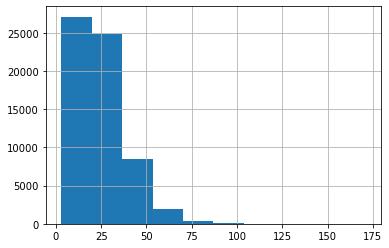

In [20]:
DATIS['NameLen'].hist()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [22]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [23]:
DATIS.Label2=DATIS.Label2.str.lower()

In [24]:
binomiallist=[]
for i in range(0,len(DATIS)):
        binomiallist.append(np.random.binomial(1, .5))

In [25]:
DATIS['Keep']=binomiallist
DATIS['Keep']=np.where((DATIS['Label2']=='other'),DATIS['Keep'],1)

In [26]:
DATIS[(DATIS['Label2']=='other')]['Keep'].value_counts()

1    5636
0    5524
Name: Keep, dtype: int64

In [27]:
DATIS2=DATIS[DATIS['Keep']==1]

In [28]:
DATIS2['Dummy']=1

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
len(DATIS2)

57318

In [30]:
DATIS2[['Name','Category','Total']].drop_duplicates()

,Name,Category,Total
0,C2C_Acces Panel,Generic Models,14
1,DLRJ_Access_Pane2x2l,Doors,28
2,Access Control Device,Security Devices,52
3,DLRJ_Access_Panel,Doors,85
4,+BMS_Access Panel_Generic,Generic Models,3
...,...,...,...
62837,Workstation_L-Shape_FileFile_DLR,Furniture,100
62838,Workstation_L-Shape_FileFile_DLR_LONG,Furniture,1
62839,E0117-Workstation straight freestanding,Furniture,12
62840,E0123_workstation straight freestanding 72W,Furniture,12


In [31]:
print(len(DATIS2[['Name','Category','Total']].drop_duplicates()))
print(len(DATIS2[['Name','Total']].drop_duplicates()))

57318
57106


In [32]:
DATIS2=DATIS2.rename(columns={'Label2':'InputType'})

In [33]:
#DATIS2['Name'] = DATIS2['CleanName']

In [34]:
size = 400        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
DATIS3=DATIS2.groupby('InputType', as_index=False).apply(fn).reset_index(drop=True)

In [35]:
#Hold Out
size = 15        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
DATISHOLD=DATIS2.groupby('InputType', as_index=False).apply(fn)

In [36]:
len(DATIS3)

148800

In [37]:
DATIS3=DATIS3[DATIS3['Name'].isin(list(DATISHOLD['Name']))==False]

In [38]:
y = DATIS3.InputType.str.lower()

In [39]:
yhold=DATISHOLD.InputType.str.lower()
xhold=DATISHOLD['Name']

In [40]:
X = DATIS3['Name']

In [41]:
#DATIS2['ID']=DATIS2.reset_index(drop=True).index.values

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [43]:
#ToScore.to_csv('SpaceProgramClassed.csv')

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvec=TfidfVectorizer(ngram_range=(1,1),max_df=.4,min_df=1,norm='l2',smooth_idf=True,sublinear_tf=False,use_idf=True)
mod=SGDClassifier(penalty='l1',loss='log')

#vectorizer.fit(X_train)
#X_train2=vectorizer.transform(X_train)
#X_test2=vectorizer.transform(X_test)




text_clf = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', mod),
])


text_clf.fit(X, y)

#mod.fit(X_train2, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(xhold)
print('accuracy %s' % accuracy_score(y_pred2,yhold))
#print(classification_report(y_test, y_pred2))


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))

accuracy 0.5550179211469534


In [45]:
from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(xhold)
print('accuracy %s' % accuracy_score(y_pred2, yhold))
#print(classification_report(y_test, y_pred2))


print('accuracy %s' % accuracy_score(y_pred2,yhold))
print(classification_report(yhold, y_pred2))
crp=classification_report(yhold, y_pred2,output_dict=True)

accuracy 0.5550179211469534
accuracy 0.5550179211469534
                                                      precision    recall  f1-score   support

                                 access panel panels       1.00      0.33      0.50        15
                          accessories accessory bivi       0.83      0.67      0.74        15
          acoustic acoustics acoustical panel panels       1.00      0.93      0.97        15
                                     air conditioner       1.00      0.87      0.93        15
                                         alarm panel       0.92      0.73      0.81        15
                                        andreu world       0.94      1.00      0.97        15
                                               apron       0.70      0.47      0.56        15
                                      arched molding       1.00      1.00      1.00        15
                             auditorium roof framing       1.00      0.73      0.85        15
   

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [46]:
crpDF=pd.DataFrame(crp).transpose()

In [47]:
crpDF.query('precision<.5').sort_values('precision')

,precision,recall,f1-score,support
int frame,0.000000,0.000000,0.000000,15.0
stringer,0.000000,0.000000,0.000000,15.0
ssd wall,0.000000,0.000000,0.000000,15.0
sink sinks basin basins,0.000000,0.000000,0.000000,15.0
mod light,0.000000,0.000000,0.000000,15.0
mobile charging charge,0.000000,0.000000,0.000000,15.0
lounge sofa,0.000000,0.000000,0.000000,15.0
int mframe fixed,0.000000,0.000000,0.000000,15.0
door doors sgl,0.000000,0.000000,0.000000,15.0
window cvt frame fixed,0.000000,0.000000,0.000000,15.0


0.8823529411764706


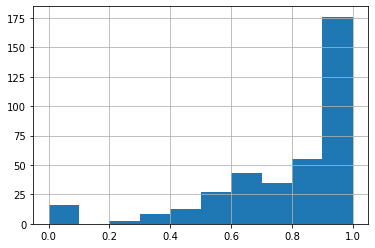

In [48]:
pd.DataFrame(crp).transpose()['precision'].hist()
print(pd.DataFrame(crp).transpose()['precision'].median())

0.6666666666666665


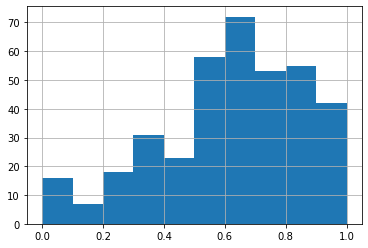

In [49]:
pd.DataFrame(crp).transpose()['f1-score'].hist()
print(pd.DataFrame(crp).transpose()['f1-score'].median())

In [50]:
from sklearn.naive_bayes import *
clf = BernoulliNB()
text_clf2 = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', clf),
])


text_clf2.fit(X, y)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred22 = text_clf2.predict(xhold)
print('accuracy %s' % accuracy_score(y_pred22, yhold))
print(classification_report(yhold, y_pred22))


accuracy 0.1629032258064516
                                                      precision    recall  f1-score   support

                                 access panel panels       0.00      0.00      0.00        15
                          accessories accessory bivi       0.00      0.00      0.00        15
          acoustic acoustics acoustical panel panels       1.00      1.00      1.00        15
                                     air conditioner       1.00      0.13      0.24        15
                                         alarm panel       1.00      0.07      0.12        15
                                        andreu world       0.00      0.00      0.00        15
                                               apron       0.00      0.00      0.00        15
                                      arched molding       1.00      1.00      1.00        15
                             auditorium roof framing       1.00      0.47      0.64        15
                               

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [51]:
crp2=classification_report(yhold, y_pred22,output_dict=True)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Median Score: 0.0


Room Inputs Predicted With Less Than 80% Precision

                             precision    recall  f1-score      support
access panel panels          0.000000  0.000000  0.000000    15.000000
accessories accessory bivi   0.000000  0.000000  0.000000    15.000000
andreu world                 0.000000  0.000000  0.000000    15.000000
apron                        0.000000  0.000000  0.000000    15.000000
bar bars ground grounding    0.361111  0.866667  0.509804    15.000000
...                               ...       ...       ...          ...
wood slats slat              0.000000  0.000000  0.000000    15.000000
x ray                        0.000000  0.000000  0.000000    15.000000
accuracy                     0.162903  0.162903  0.162903     0.162903
macro avg                    0.268009  0.162903  0.161417  5580.000000
weighted avg                 0.268009  0.162903  0.161417  5580.000000

[294 rows x 4 columns]


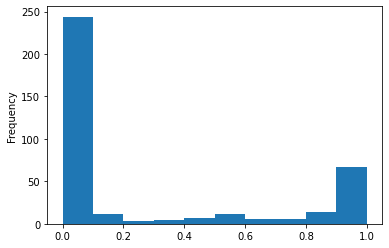

In [52]:
print('Median Score:',pd.DataFrame(crp2).transpose()['precision'].median())
pd.DataFrame(crp2).transpose()['precision'].plot(kind='hist')

print('\n\nRoom Inputs Predicted With Less Than 80% Precision\n\n',pd.DataFrame(crp2).transpose().query('precision<.8'))

In [55]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
from onnxmltools import save_model
from onnxruntime import InferenceSession

In [56]:
onnx_model = convert_sklearn(text_clf,
name='JCRoomTypeClassifier',
initial_types=[('input', StringTensorType([1, 1]))]
)

save_model(onnx_model, 'JC.onnx')
sess = InferenceSession("JC.onnx")
label_name = sess.get_outputs()[0].name
input_name = sess.get_inputs()[0].name

#res = sess.run(None, input_feed={'input': np.array([['corridor']])})

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\operator_converters\text_vectoriser.py:185: UserWarning: Converter for TfidfVectorizer will use scikit-learn regular expression by default in version 1.6.
  UserWarning)
C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\common\_container.py:595: UserWarning: Unable to find operator 'Tokenizer' in domain 'com.microsoft' in ONNX, op_version is forced to 1.
  op_type, domain))


In [90]:
DATIS[DATIS['RoomName'].str.contains('court')]['RoomName'].value_counts()

std jury courtroom                                    229
std courtroom                                          70
juvenile courtroom                                     43
courtroom                                              22
court reporter                                         19
large trial courtroom                                  14
court room                                             13
court admin office                                      7
future courtroom                                        6
courtroom deputy b                                      6
courtyard                                               6
courts                                                  6
jury courtroom                                          6
courtroom deputy c                                      6
standard trial courtroom                                6
court                                                   6
courtroom deputy a                                      6
excerise court

In [84]:
sess.run(None, input_feed={'input': np.array([["Outdoor Exercise Court"]])})


[array(['court'], dtype=object),
 [{'bailiff': 0.0002894130884669721,
   'balcony': 0.00021149592066649348,
   'booking law': 0.00034584300010465086,
   'break room': 9.63763304753229e-05,
   'cart carts handling': 0.00030858570244163275,
   'chase': 0.0001596335059730336,
   'circulation': 0.0002786496770568192,
   'classroom': 1.543940743431449e-05,
   'closet jan': 0.0003261362435296178,
   'coffee cafe': 0.0003527702356223017,
   'communication communications telecom': 7.246812310768291e-05,
   'conference': 0.00024678430054336786,
   'control': 0.00025943160289898515,
   'cooler freezer freezers': 0.00026399255148135126,
   'corridor hallway': 0.00017339945770800114,
   'corridor vestibule': 0.00033005038858391345,
   'court': 0.4361991286277771,
   'courtyard outdoor': 0.00035659389686770737,
   'day room': 4.669848203775473e-05,
   'dental dentist': 0.00025839131558313966,
   'detox': 0.0003010625368915498,
   'dialysis': 0.0003901280288118869,
   'dinning': 0.000339760998031124

In [43]:
with open("TextClassifier1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [42]:
res

[array(['services1'], dtype=object),
 [{'amenity': 0.07348394393920898,
   'circulation': 0.044751111418008804,
   'collaboration: closed': 0.07773763686418533,
   'collaboration: open': 0.04349435120820999,
   'desking: open workstation': 0.031024377793073654,
   'desking: private office': 0.049801651388406754,
   'lab': 0.04049787297844887,
   'services 2': 0.039142508059740067,
   'services1': 0.4987942576408386,
   'support': 0.10127229988574982}]]

In [79]:
matchdf=pd.DataFrame({'A':list(y_pred2[X_test.isin(list(X_train))==False]),
              'B':list(y_test[X_test.isin(list(X_train))==False])})

In [80]:
matchdf['C']=(matchdf['A']==matchdf['B'])*1

In [81]:
matchdf['D']=1

In [82]:
labels=list(matchdf.groupby(['A'])['D'].sum().index)

In [83]:
scores=list(matchdf.groupby(['A'])['C'].sum().values/matchdf.groupby(['A'])['D'].sum().values)

In [84]:
print('Accuracy:',matchdf['C'].sum()/matchdf['D'].sum())

Accuracy: 0.8950617283950617


In [85]:
pd.DataFrame({'Category':labels,'Guesses':list(matchdf.groupby(['A'])['D'].sum().values),'True Positive Rate':scores})

,Category,Guesses,True Positive Rate
0,art digital exist,10,0.600000
1,bathroom,32,0.843750
2,classroom,83,0.879518
3,collaboration student work,4,1.000000
4,common social collaboration,11,0.636364
5,conference resource collaboration,6,0.833333
6,corridor mail central,3,0.666667
7,lab exist flex,23,0.782609
8,locker athletic official,13,1.000000
9,mechanical yard auditorium,5,0.800000


C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

<AxesSubplot:title={'center':'Classifier Validation Score As Training Data Grows'}, xlabel='Training Data Size', ylabel='Validation Score'>

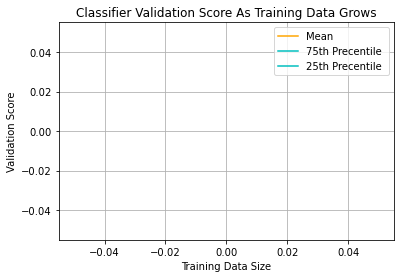

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#np.random.seed(0)
#X, y = load_iris(return_X_y=True)
#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(penalty='l1',loss='log',alpha=0.00001),
                                                         X_train, y_train, train_sizes=[10,20,30,40,50,60,70,80,90,100,
                                                                                         110,120,130,140,150,160,170,180,190,200,
                                                                                         210,220,230,240,250,260,270,280,290,300,
                                                                                         310,320,330,340,350,360,370,380,390,400,
                                                                                        410,420,430],cv=5)
pd.DataFrame({'Mean':list(pd.DataFrame(valid_scores.transpose()).median()),
             '75th Precentile ':list(pd.DataFrame(valid_scores.transpose()).quantile(0.75)),
             '25th Precentile':list(pd.DataFrame(valid_scores.transpose()).quantile(0.25))},
             index=train_sizes).plot(color = ['orange', 'c','c'],
                                    xlabel='Training Data Size',ylabel='Validation Score',
                                     grid=True,title='Classifier Validation Score As Training Data Grows')

In [37]:
pd.DataFrame(valid_scores.transpose()).mean().plot()

NameError: name 'valid_scores' is not defined

In [38]:
pd.DataFrame(pd.DataFrame(valid_scores.transpose())).plot()

NameError: name 'valid_scores' is not defined